# Chapter 3.4 영화 리뷰 분류 : 이진 분류 예제

## Load data IMDB Dataset

In [1]:
from keras.datasets import imdb

## data split

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 23s 1us/step


In [5]:
# 긍정 1, 부정 0
train_labels[0], train_labels[1]

(1, 0)

- 원래 텍스트로 한원하기

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[19]])

In [8]:
decoded_review

"? chances are is a charming romantic fantasy about a woman ? shepherd whose husband christopher ? is killed shortly after learning she is pregnant we then see the husband in heaven letting the powers that be know that he was taken too soon and that his wife needs him he is told he can return to earth but not as himself ? 19 years where we see ? daughter mary stuart masterson preparing to graduate from college and ? a young man robert downey jr who it turns out is the reincarnation of her father the film is a little on the predictable side the story goes all the places you expect it to but it is so ? played by an energetic cast especially shepherd and downey that you can't help but get wrapped up in the fun shepherd has rarely been seen on screen to better advantage and she and downey are backed by a talented group of character actors in supporting roles a lovely and charming fantasy that will ? and ? you"

## data preprocessing

 - x data vectorization

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
        
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

 - label data vectorization

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Model Construction

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### model compile

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### optimizer 매개변수 전달

In [16]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### 손실과 측저을 함수 객체로 지정하기

In [19]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

### model validation

In [20]:
x_val = x_train[:10000]
partial_x_train = x_test[10000:]
y_val = y_train[:10000]
partail_y_train = y_train[10000:]

In [21]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partail_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.6935 - acc: 0.4980 - val_loss: 0.6926 - val_acc: 0.5190
Epoch 2/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.6798 - acc: 0.5782 - val_loss: 0.7088 - val_acc: 0.4883
Epoch 3/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.6329 - acc: 0.6573 - val_loss: 0.7112 - val_acc: 0.5095
Epoch 4/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.5866 - acc: 0.7075 - val_loss: 0.7284 - val_acc: 0.5141
Epoch 5/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.5431 - acc: 0.7422 - val_loss: 0.7466 - val_acc: 0.5171
Epoch 6/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.4997 - acc: 0.7753 - val_loss: 0.7975 - val_acc: 0.5061
Epoch 7/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.4574 - acc: 0.8024 - val_loss: 0.8214 - val_ac

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### visualization

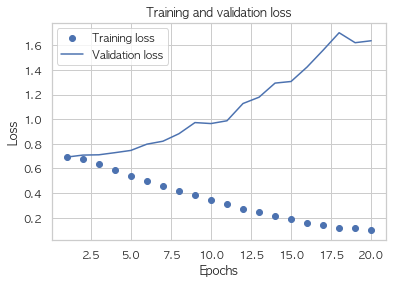

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs= range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

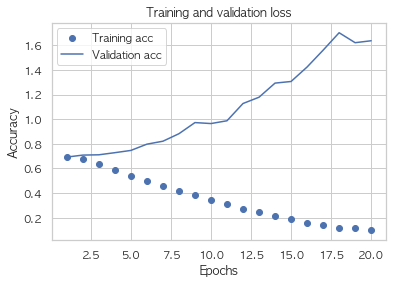

In [24]:
# plot 초기화
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### model train

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.4750 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 1s 51us/step - loss: 0.2655 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.1983 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 2s 74us/step


#### model predict

In [26]:
model.predict(x_test)


array([[0.13780786],
       [0.99970007],
       [0.32023954],
       ...,
       [0.07251604],
       [0.04398613],
       [0.4794224 ]], dtype=float32)

### 추가 실험

#### 3개의 hidden layer 사용하기

In [27]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.4581 - acc: 0.8132
Epoch 2/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2628 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2004 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 1s 41us/step


#### 은닉 유닛 변경하기

In [28]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.4434 - acc: 0.8144
Epoch 2/4
25000/25000 [==============================] - 1s 53us/step - loss: 0.2491 - acc: 0.9104
Epoch 3/4
25000/25000 [==============================] - 1s 53us/step - loss: 0.1913 - acc: 0.9307
Epoch 4/4
25000/25000 [==============================] - 1s 50us/step


In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.4261 - acc: 0.8090
Epoch 2/4
25000/25000 [==============================] - 1s 60us/step - loss: 0.2365 - acc: 0.9105
Epoch 3/4
25000/25000 [==============================] - 1s 60us/step - loss: 0.1835 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 2s 73us/step


#### mse 손실함수 사용하기

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.1461 - acc: 0.8247
Epoch 2/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.0777 - acc: 0.9121
Epoch 3/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.0585 - acc: 0.9311
Epoch 4/4
25000/25000 [==============================] - 1s 41us/step


In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.4380 - acc: 0.8320
Epoch 2/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.2399 - acc: 0.9128
Epoch 3/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.1792 - acc: 0.9332
Epoch 4/4
25000/25000 [==============================] - 1s 44us/step
